In [24]:

# General libraries
import pandas as pd
import numpy as np

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

<a class="anchor" id="2"></a>
# 2. EDA
[Back To Top](#toc)

We will work with only Crypto-USDT pairs. This is to ensure consistency in the research and USDT (USD Tether) have more business use cases than other currencies. From part 1, we found that there are around 409 crypto-USDT pairs. Let's look deeper into these cryptos.

<a class="anchor" id="2.0"></a>
## 2.0 USDT
[Back To Top](#toc)

The EDA use the following for references:
 - https://www.kaggle.com/code/hrkzszk/analysis-in-cryptocurrencies-using-r  
 - https://www.kaggle.com/code/viacheslavzhuk/crypto-gala-advanced-eda/notebook
 - https://www.kaggle.com/code/huseinzol05/crypto-notebook

In [25]:
# Load the dataset from part 1
combined_1H_clean = pd.read_pickle('1H_combined_clean.pkl')
combined_1H_clean

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,symbol
0,2021-04-15 07:00:00,10.0000,10.2500,9.9700,10.0700,9367.65,2021-04-15 08:00:00,95067.46,816,7204.75,73150.56,1INCHDOWNUSDT
1,2021-04-15 08:00:00,10.0300,10.3000,9.7400,10.2100,2426.47,2021-04-15 09:00:00,24341.43,197,1115.29,11307.37,1INCHDOWNUSDT
2,2021-04-15 09:00:00,10.1700,10.2500,9.8600,9.9200,2581.83,2021-04-15 10:00:00,25920.09,200,1799.05,18031.08,1INCHDOWNUSDT
3,2021-04-15 10:00:00,9.9500,10.2000,9.7500,9.9700,1918.39,2021-04-15 11:00:00,19040.88,224,970.42,9642.83,1INCHDOWNUSDT
4,2021-04-15 11:00:00,9.9900,9.9900,8.7800,9.1000,9166.34,2021-04-15 12:00:00,84599.23,727,7616.09,70373.02,1INCHDOWNUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...
33099,2022-12-10 18:00:00,0.1920,0.1934,0.1918,0.1930,351724.00,2022-12-10 19:00:00,67712.02,305,191306.00,36844.46,ZRXUSDT
33100,2022-12-10 19:00:00,0.1931,0.1936,0.1928,0.1929,108416.00,2022-12-10 20:00:00,20945.84,190,44794.00,8654.92,ZRXUSDT
33101,2022-12-10 20:00:00,0.1928,0.1931,0.1919,0.1930,329179.00,2022-12-10 21:00:00,63382.62,221,122794.00,23663.61,ZRXUSDT
33102,2022-12-10 21:00:00,0.1930,0.1931,0.1922,0.1922,60141.00,2022-12-10 22:00:00,11595.18,132,17820.00,3438.39,ZRXUSDT


In [26]:
# Counts all unique pairs
combined_1H_clean['symbol'].value_counts()

BTCUSDT        46475
ETHUSDT        46475
BNBUSDT        44538
NEOUSDT        44202
LTCUSDT        43651
               ...  
VENUSDT          724
PHBUSDT          543
BNBBULLUSDT      483
BNBBEARUSDT      483
DAIUSDT          470
Name: symbol, Length: 412, dtype: int64

We see that BTC, ETH and BNB have the most rows. This made sense because when Binance exchange launched in 2017, these coins have in the market since 2009 or 2013. The longer the rows, the older the cryptos.

### 2.0 Top 20 Oldest Crypto Pairs Listed on Binance

Text(0.5, 1.0, 'Top 20 oldest crypto pairs listed on Binance since 2017')

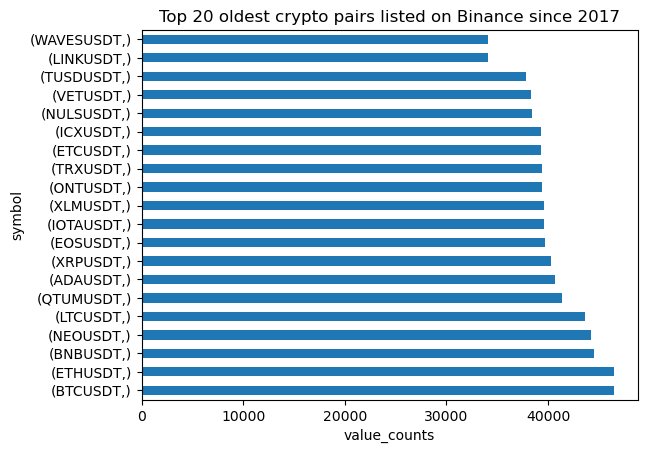

In [27]:
# Counts all unique pairs and extract only 20 the by age (check by row lengths)
combined_1H_clean[['symbol']].value_counts()[:20].plot(kind='barh')
plt.xlabel('value_counts')
plt.title('Top 20 oldest crypto pairs listed on Binance since 2017')


In [28]:
# Counts all unique pairs and extract only the top 20 by age (check by row lengths)
crypto_count = combined_1H_clean['symbol'].value_counts().head(20).reset_index()

# Save them into a list for later use
crypto_count = crypto_count['index'].tolist()

print(crypto_count)

['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'NEOUSDT', 'LTCUSDT', 'QTUMUSDT', 'ADAUSDT', 'XRPUSDT', 'EOSUSDT', 'IOTAUSDT', 'XLMUSDT', 'ONTUSDT', 'TRXUSDT', 'ETCUSDT', 'ICXUSDT', 'NULSUSDT', 'VETUSDT', 'TUSDUSDT', 'LINKUSDT', 'WAVESUSDT']


In [29]:
# Check the percentage of each crypto in Binance
print(combined_1H_clean['symbol'].value_counts()/combined_1H_clean.shape[0]*100)

BTCUSDT        0.659562
ETHUSDT        0.659562
BNBUSDT        0.632072
NEOUSDT        0.627304
LTCUSDT        0.619484
                 ...   
VENUSDT        0.010275
PHBUSDT        0.007706
BNBBULLUSDT    0.006855
BNBBEARUSDT    0.006855
DAIUSDT        0.006670
Name: symbol, Length: 412, dtype: float64


This is a simple check to see the percentage of each crypto in the exchange. Usually the higher the percentage, the older the crypto and also, the more popular the crypto. WE can also check for null and dupplicated values. This process takes a long time because there are over 6.6M rows. The code is included below but I am quite confident that there is no null or dupplicated values because the data is extracted directly from the Binance API. 

In [30]:
# Check na and dups (time consuming, only run once)

# display(combined_1H_clean.isna().sum())
# display(combined_1H_clean.duplicated().sum())

### 2.0.1 Plotting all crypto pairs on a time series

In [31]:
# Count the lengths of rows of each unique symbol to sort the crypto by oldest to newest 
crypto_age = combined_1H_clean.groupby(['symbol'])[['Close', 'Volume', 'Number of trades', 'Quote asset volume','Close time']].min()
crypto_age = crypto_age.reset_index()

# all crypto pairs by price and Open time witohut scaler
display(crypto_age)

,symbol,Close,Volume,Number of trades,Quote asset volume,Close time
0,1INCHDOWNUSDT,0.005085,0.00,0,0.0,2021-04-15 08:00:00
1,1INCHUPUSDT,0.019050,125.64,1,20.0,2021-04-15 08:00:00
2,1INCHUSDT,0.433000,0.00,0,0.0,2020-12-25 06:00:00
3,AAVEDOWNUSDT,0.000135,0.00,0,0.0,2020-11-26 08:00:00
4,AAVEUPUSDT,0.554000,0.00,0,0.0,2020-11-26 08:00:00
...,...,...,...,...,...,...
407,YGGUSDT,0.194100,0.00,0,0.0,2021-09-24 07:00:00
408,ZECUSDT,20.380000,0.00,0,0.0,2019-03-21 05:00:00
409,ZENUSDT,5.070000,0.00,0,0.0,2020-07-06 06:00:00
410,ZILUSDT,0.002610,0.00,0,0.0,2019-02-19 12:00:00


In [32]:
# Plot using plotly to map the time series of cryptos when it was created
fig = px.scatter(data_frame = crypto_age, 
                 x='Close time', 
                 y='Close', 
                 log_y=True, # use log on y values which is Close Price
                 title='All Crypto Price listed on Binance Since 2017', 
                 hover_name='symbol', color=np.log10(crypto_age['Close']))

# Check this for reference https://plotly.com/python/colorscales/
fig.update_layout(coloraxis_colorbar=dict(
     title="Price $",
     tickvals=[-6,-5,-4,-2,0,1,2,3], #put the ticks on the legend
     ticktext=["0.0001", "0.001", "0.01", "0.1", "1", "10", "100", "1000"], # put the values based on the numbers of ticks
     ))
            
fig.show()

The chart above is AMAZING. Thechart showed when each crypto was listed on Binance for the first time. So the chart only captured the time and price of the moment not continuous. As a common practice, traders only care about `CLOSE PRICE`, thus we will use CLOSE column for price and `CLOSE TIME` for time. we can run the curser on the chart, it will show each crypto at the exact price and time when it first listed

In [33]:
# This code is optional to save the figure above as html file
# fig.write_html('All Crypto Price listed on Binance Since 2017.html',
#                 full_html=True,
#                 include_plotlyjs='cdn')

### 2.0.2 Correlation between top crypto by prices

In [34]:
#Extract symbol and turn into columns, keep close price
crypto_price= combined_1H_clean[['Close time', 'Close', 'symbol']]

# Only show corr of the top 20 cryptos
crypto_price = crypto_price.loc[crypto_price['symbol'].isin(crypto_count)]

# Check
crypto_price

,Close time,Close,symbol
0,2018-04-17 05:00:00,0.26664,ADAUSDT
1,2018-04-17 06:00:00,0.26200,ADAUSDT
2,2018-04-17 07:00:00,0.25664,ADAUSDT
3,2018-04-17 08:00:00,0.25698,ADAUSDT
4,2018-04-17 09:00:00,0.25631,ADAUSDT
...,...,...,...
40267,2022-12-10 19:00:00,0.38710,XRPUSDT
40268,2022-12-10 20:00:00,0.38730,XRPUSDT
40269,2022-12-10 21:00:00,0.38740,XRPUSDT
40270,2022-12-10 22:00:00,0.38630,XRPUSDT


In [35]:
# Drop time in datetime
# https://stackoverflow.com/questions/59058127/series-object-has-no-attribute-datetime
crypto_price['Close time'] = crypto_price['Close time'].dt.year

# Check
crypto_price['Close time']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
40267    2022
40268    2022
40269    2022
40270    2022
40271    2022
Name: Close time, Length: 806777, dtype: int64

In [36]:
#Group by date, find mean
crypto_price = crypto_price.groupby(['Close time', 'symbol'])[['Close']].mean()

display(crypto_price)

Close
Close time symbol                
2017       BNBUSDT       3.276340
           BTCUSDT    7574.122249
           ETHUSDT     385.004709
           LTCUSDT     274.923827
           NEOUSDT      47.454606
...                           ...
2022       TUSDUSDT      1.000161
           VETUSDT       0.037996
           WAVESUSDT    10.048707
           XLMUSDT       0.149000
           XRPUSDT       0.521813

[103 rows x 1 columns]

In [37]:
crypto_price = crypto_price.reset_index()

display(crypto_price)

,Close time,symbol,Close
0,2017,BNBUSDT,3.276340
1,2017,BTCUSDT,7574.122249
2,2017,ETHUSDT,385.004709
3,2017,LTCUSDT,274.923827
4,2017,NEOUSDT,47.454606
...,...,...,...
98,2022,TUSDUSDT,1.000161
99,2022,VETUSDT,0.037996
100,2022,WAVESUSDT,10.048707
101,2022,XLMUSDT,0.149000


In [38]:
# create a pivot table so that values in column 'symbol' become the column names.
# Index is Close time, values are Close Price
crypto_pivot = crypto_price.pivot_table(index='Close time', columns='symbol', values='Close')

display(crypto_pivot)

symbol,ADAUSDT,BNBUSDT,BTCUSDT,EOSUSDT,ETCUSDT,ETHUSDT,ICXUSDT,IOTAUSDT,LINKUSDT,LTCUSDT,NEOUSDT,NULSUSDT,ONTUSDT,QTUMUSDT,TRXUSDT,TUSDUSDT,VETUSDT,WAVESUSDT,XLMUSDT,XRPUSDT
Close time,,,,,,,,,,,,,,,,,,,,
2017,NaN,3.276340,7574.122249,NaN,NaN,385.004709,NaN,NaN,NaN,274.923827,47.454606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,0.128880,11.123989,7541.450149,6.161971,11.116221,480.900264,0.806136,0.685580,NaN,105.260745,50.129372,1.141925,2.397611,8.285449,0.025253,1.007039,0.011024,NaN,0.217002,0.461209
2019,0.055141,19.968780,7353.053066,3.995013,5.533180,180.779071,0.251936,0.295134,1.579285,69.230568,10.124092,0.531894,0.921137,2.468019,0.022379,1.000880,0.005436,1.757701,0.087245,0.308127
2020,0.086426,21.283787,11064.456415,2.907390,6.475444,305.919038,0.343589,0.250727,7.409779,55.997149,13.126103,0.302634,0.600969,2.119068,0.020676,0.999793,0.010144,2.371153,0.082119,0.257523
2021,1.497852,377.520149,47357.318076,4.654636,42.097679,2770.466403,1.540908,1.209737,26.570593,185.617174,46.143743,0.633521,1.045480,10.350254,0.080198,0.999576,0.102605,17.843469,0.362614,0.865524
2022,0.667160,329.318498,28920.137914,1.640945,27.914782,2037.201874,0.474500,0.483430,10.609124,80.801937,13.999060,0.302161,0.351224,4.493790,0.064918,1.000161,0.037996,10.048707,0.149000,0.521813


In [39]:
crypto_pivot.describe()

symbol,ADAUSDT,BNBUSDT,BTCUSDT,EOSUSDT,ETCUSDT,ETHUSDT,ICXUSDT,IOTAUSDT,LINKUSDT,LTCUSDT,NEOUSDT,NULSUSDT,ONTUSDT,QTUMUSDT,TRXUSDT,TUSDUSDT,VETUSDT,WAVESUSDT,XLMUSDT,XRPUSDT
count,5.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,4.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000
mean,0.487092,127.081924,18301.756311,3.871991,18.627461,1026.711893,0.683414,0.584922,11.542195,128.638567,30.162829,0.582427,1.063284,5.543316,0.042685,1.001490,0.033441,8.005258,0.179596,0.482839
std,0.618363,176.101944,16492.996278,1.716078,15.911127,1096.048623,0.523368,0.389387,10.693609,85.190247,19.524991,0.344614,0.793996,3.636976,0.027849,0.003141,0.040724,7.566179,0.116041,0.239649
min,0.055141,3.276340,7353.053066,1.640945,5.533180,180.779071,0.251936,0.250727,1.579285,55.997149,10.124092,0.302161,0.351224,2.119068,0.020676,0.999576,0.005436,1.757701,0.082119,0.257523
25%,0.086426,13.335187,7549.618174,2.907390,6.475444,325.690456,0.343589,0.295134,5.952156,72.123410,13.344343,0.302634,0.600969,2.468019,0.022379,0.999793,0.010144,2.217790,0.087245,0.308127
50%,0.128880,20.626283,9319.289332,3.995013,11.116221,432.952487,0.474500,0.483430,9.009452,93.031341,30.071402,0.531894,0.921137,4.493790,0.025253,1.000161,0.011024,6.209930,0.149000,0.461209
75%,0.667160,252.309820,24456.217539,4.654636,27.914782,1648.126472,0.806136,0.685580,14.599491,165.528067,47.126890,0.633521,1.045480,8.285449,0.064918,1.000880,0.037996,11.997398,0.217002,0.521813
max,1.497852,377.520149,47357.318076,6.161971,42.097679,2770.466403,1.540908,1.209737,26.570593,274.923827,50.129372,1.141925,2.397611,10.350254,0.080198,1.007039,0.102605,17.843469,0.362614,0.865524


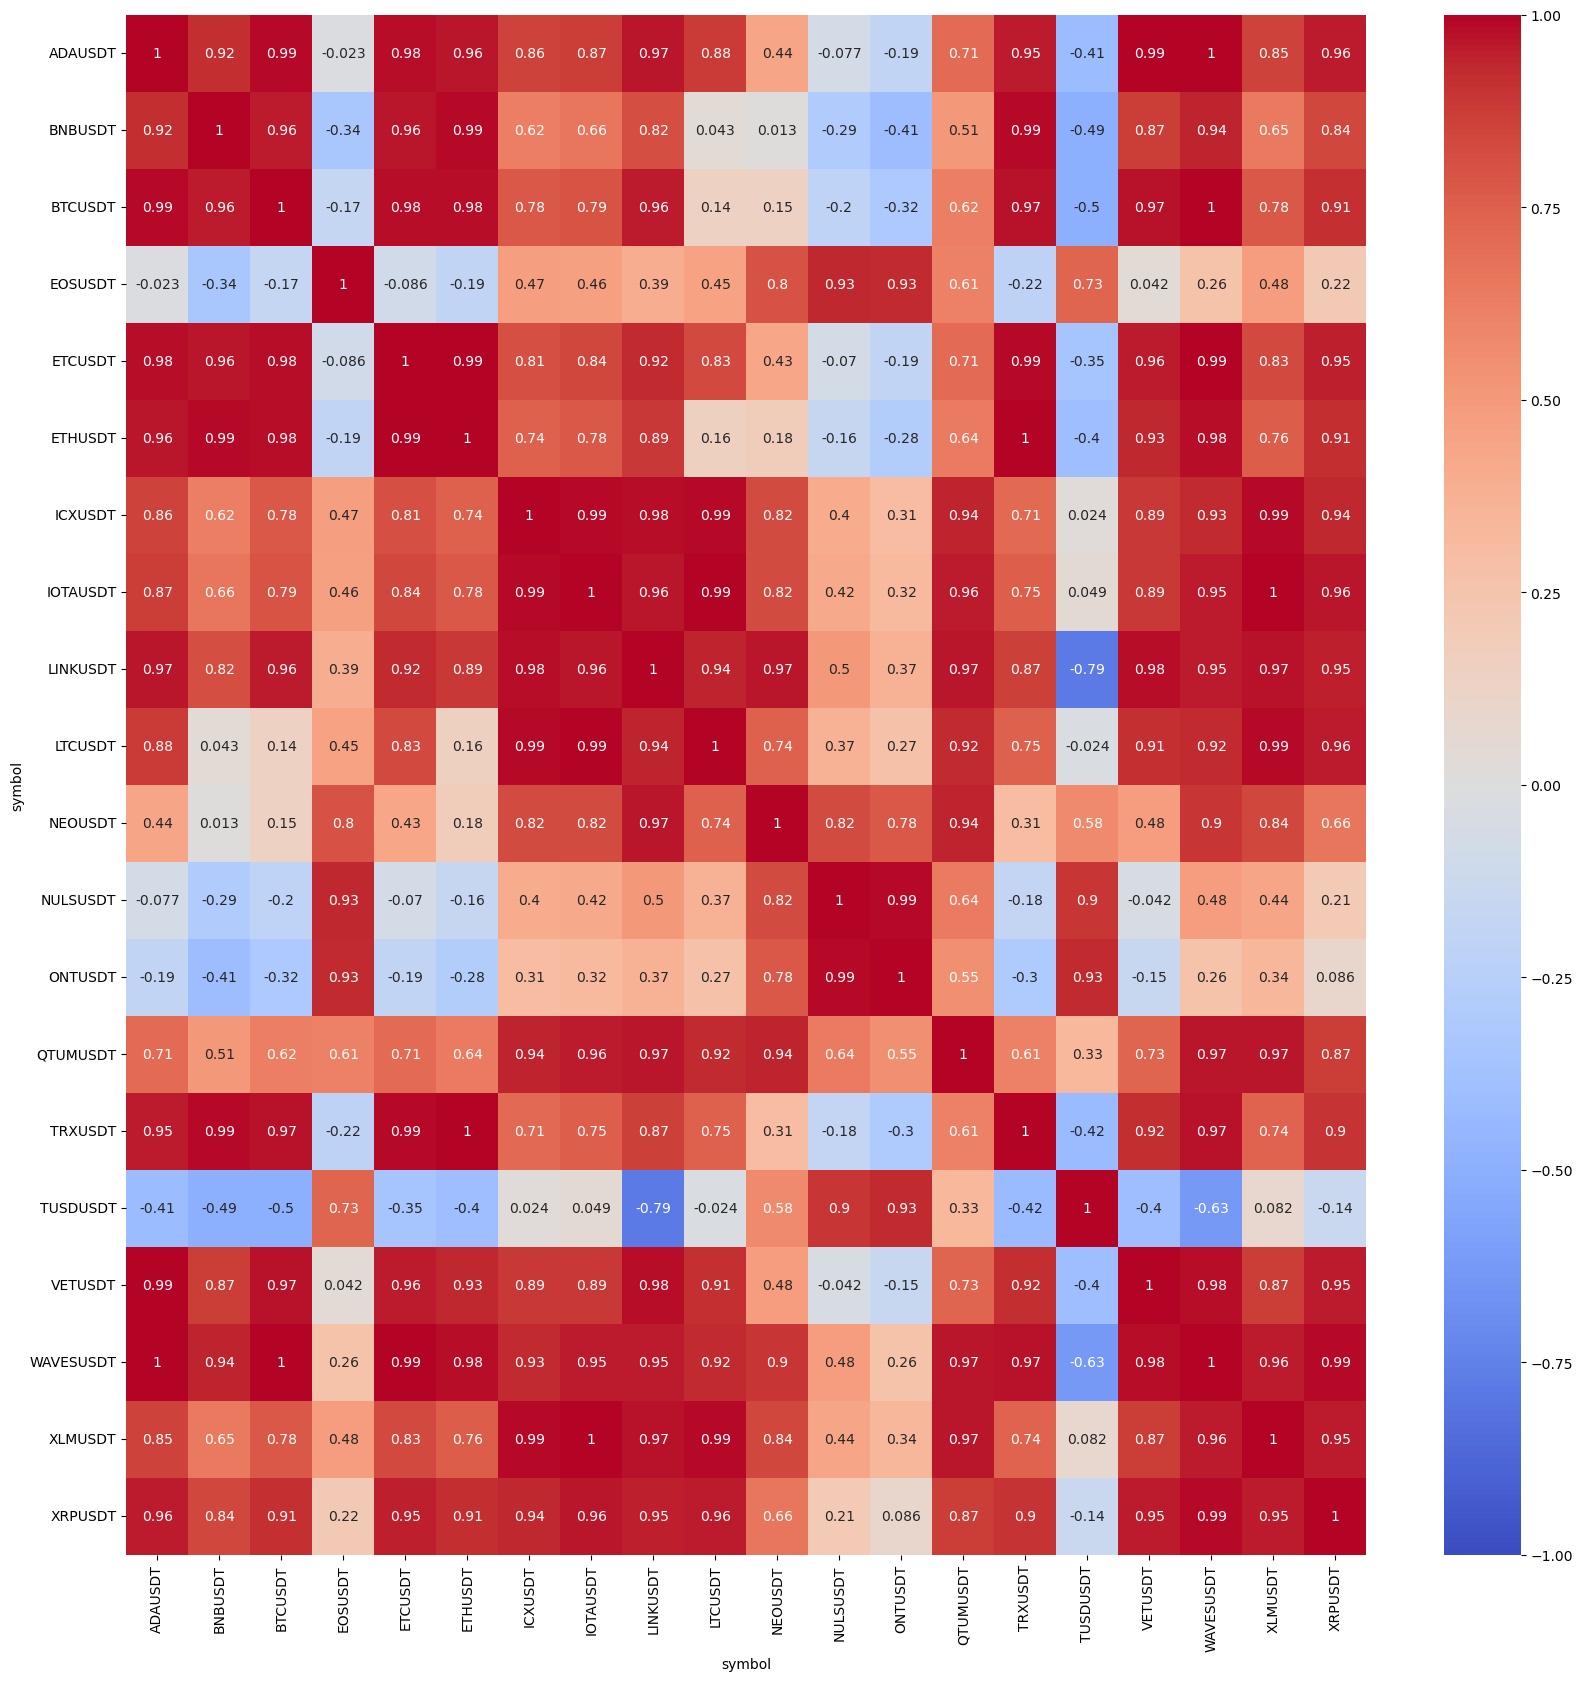

In [40]:
# Visualize with seaborn
# This is the correlation of the pivot table which is crypto._pivot.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(crypto_pivot.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.show()

From a brief observation we see that all of the top 20 cryptos have high correlations with each other exept a few outliers. This trend should be consistent for the rest of the 409 crypto pairs. This is because many cryptos were built on top of the older crypto such as TRXUSDT and WAVESUSDT are built on the Ethereum blockchain (ETHUSDT). Thus, if price of ETHUSDT goes down, other smaller cryptos will go down as well.

### 2.0.3 Grouping Crypto Pairs by Years 

For the Grouping by Years, it will be done a bit differently than Months or Dates. The reason is that crypto_year will be used later in Clustering and we need all the features for K-means to evaluate. While Motnhs or Dates, we only need to do EDA.

In [41]:
# Group by YEAR

## Create a new dataframe which focus on the year 
# Drop the Open Time as Close time or Open Time is highly correlated and we dont need both.
# Good practice in trading world to use Close time, and Close Price, not Open

crypto_year = combined_1H_clean[combined_1H_clean.columns.difference(['Open time'])]

# dt.year only able to run once, then it will convert the dtype into int64
crypto_year['Close time'] = crypto_year['Close time'].dt.to_period('Y')

# Get mean value 
crypto_year = crypto_year.groupby(['Close time', 'symbol'])[['Close', 'High', 'Low', 'Number of trades', 'Open',
       'Quote asset volume', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Volume']].sum()

print(crypto_year)


C:\Users\ethai\AppData\Local\Temp\ipykernel_7768\1563043033.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                           Close          High           Low  \
Close time symbol                                              
2017       BCCUSDT  2.125306e+06  2.178818e+06  2.075277e+06   
           BNBUSDT  4.390296e+03  4.483804e+03  4.277244e+03   
           BTCUSDT  2.482040e+07  2.509261e+07  2.451488e+07   
           ETHUSDT  1.261660e+06  1.275878e+06  1.246570e+06   
           LTCUSDT  1.242656e+05  1.271009e+05  1.214404e+05   
...                          ...           ...           ...   
2022       YGGUSDT  1.171203e+04  1.184296e+04  1.159656e+04   
           ZECUSDT  7.487720e+05  7.554168e+05  7.422936e+05   
           ZENUSDT  2.090280e+05  2.108487e+05  2.072660e+05   
           ZILUSDT  4.084844e+02  4.127752e+02  4.043106e+02   
           ZRXUSDT  3.580955e+03  3.613825e+03  3.550283e+03   

                    Number of trades          Open  Quote asset volume  \
Close time symbol                                                        
2017       BCCUSDT 

In [42]:
# Reset the index to check the value counts by time
crypto_year = crypto_year.reset_index()

crypto_year.value_counts('Close time')


Close time
2022    370
2021    351
2020    244
2019     88
2018     23
2017      6
Freq: A-DEC, dtype: int64

### 2.0.4 Grouping Crypto Pairs by Months 

In [43]:
# Group by YEAR-MONTH

# Assign new dataframe 
crypto_month = combined_1H_clean[combined_1H_clean.columns.difference(['Open time'])]

# dt.year only able to run once, then it will convert the dtype into int64
crypto_month['Close time'] = crypto_month['Close time'].dt.to_period('M')

# Get mean value 
crypto_month = crypto_month.groupby(['Close time', 'symbol'])[['Close', 'High', 'Low', 'Number of trades', 'Open',
       'Quote asset volume', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Volume']].sum()

print(crypto_month)

C:\Users\ethai\AppData\Local\Temp\ipykernel_7768\2636717643.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                           Close          High           Low  \
Close time symbol                                              
2017-08    BTCUSDT  1.511381e+06  1.523407e+06  1.498971e+06   
           ETHUSDT  1.164560e+05  1.175311e+05  1.152768e+05   
2017-09    BTCUSDT  2.901687e+06  2.932430e+06  2.872503e+06   
           ETHUSDT  2.100998e+05  2.127954e+05  2.076498e+05   
2017-10    BTCUSDT  3.931646e+06  3.955538e+06  3.906288e+06   
...                          ...           ...           ...   
2022-12    YGGUSDT  5.588880e+01  5.637070e+01  5.549840e+01   
           ZECUSDT  1.089450e+04  1.094030e+04  1.084990e+04   
           ZENUSDT  2.504660e+03  2.516290e+03  2.494710e+03   
           ZILUSDT  5.411220e+00  5.428390e+00  5.391920e+00   
           ZRXUSDT  4.572640e+01  4.588190e+01  4.557660e+01   

                    Number of trades          Open  Quote asset volume  \
Close time symbol                                                        
2017-08    BTCUSDT 

In [44]:
# Reset the index to check the value counts by time
crypto_month = crypto_month.reset_index()

crypto_month.value_counts('Close time')

Close time
2022-10    349
2022-11    345
2022-09    345
2022-08    344
2022-07    344
          ... 
2017-12      6
2017-11      5
2017-10      2
2017-09      2
2017-08      2
Freq: M, Length: 65, dtype: int64

### 2.0.5 Grouping Crypto Pairs by Date

In [45]:
# Group by YEAR-MONTH-DATE

# May need to re-run the ombined_1H_clean code
# Assign to a new df
crypto_date = combined_1H_clean[combined_1H_clean.columns.difference(['Open time'])]

# dt.year only able to run once, then it will convert the dtype into int64
crypto_date['Close time'] = crypto_date['Close time'].dt.to_period('D')

# Get mean value 
crypto_date = crypto_date.groupby(['Close time', 'symbol'])[['Close', 'High', 'Low', 'Number of trades', 'Open',
       'Quote asset volume', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Volume']].sum()

print(crypto_date)

C:\Users\ethai\AppData\Local\Temp\ipykernel_7768\624339151.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                             Close          High           Low  \
Close time symbol                                                
2017-08-17 BTCUSDT     82926.35000   83412.14000   82049.21000   
           ETHUSDT      5829.80000    5870.99000    5768.48000   
2017-08-18 BTCUSDT    101768.89000  102647.76000  100434.22000   
           ETHUSDT      7208.42000    7300.40000    7141.05000   
2017-08-19 BTCUSDT     97535.58000   98541.25000   96530.38000   
...                            ...           ...           ...   
2022-12-11 VIDTUSDT        0.03657       0.03661       0.03656   
           VOXELUSDT       0.21540       0.21540       0.21520   
           WOOUSDT         0.12550       0.12570       0.12530   
           XNOUSDT         0.76700       0.76700       0.76700   
           YGGUSDT         0.22410       0.22410       0.22410   

                      Number of trades          Open  Quote asset volume  \
Close time symbol                                                

In [46]:
# Reset the index to check the value counts by time
crypto_date = crypto_date.reset_index()

crypto_date.value_counts('Close time')

Close time
2022-10-24    346
2022-10-19    346
2022-10-20    346
2022-10-21    346
2022-10-22    346
             ... 
2017-10-12      2
2017-10-13      2
2017-10-14      2
2017-10-15      2
2017-08-17      2
Freq: D, Length: 1943, dtype: int64

2022 has the most data so we will perform clustering using YEAR 2022 ONLY. This is for simplifying the clustering algorithm